In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iammustafatz/diabetes-prediction-dataset")

print("Path to dataset files:", path)

100%|██████████| 734k/734k [00:00<00:00, 80.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1


In [2]:
!ls /root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1

diabetes_prediction_dataset.csv


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [11]:
# loading the dataset
data = pd.read_csv('/root/.cache/kagglehub/datasets/iammustafatz/diabetes-prediction-dataset/versions/1/diabetes_prediction_dataset.csv')

data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


# Step 1: Data cleaning

In [14]:
# Check for missing values
print("\nMissing values in each column:\n", data.isnull().sum())


Missing values in each column:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [15]:
# Encode 'gender' and 'smoking_history' columns
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['smoking_history'] = label_encoder.fit_transform(data['smoking_history'])

print("\nEncoded categorical columns:\n", data[['gender', 'smoking_history']].head())


Encoded categorical columns:
    gender  smoking_history
0       0                4
1       0                0
2       1                4
3       0                1
4       1                1


In [17]:
scaler = StandardScaler()
columns_to_normalize = ['age', 'bmi', 'blood_glucose_level', 'HbA1c_level']
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

data

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,1.692704,0,1,4,-0.321056,1.001706,0.047704,0
1,0,0.538006,0,0,0,-0.000116,1.001706,-1.426210,0
2,1,-0.616691,0,0,4,-0.000116,0.161108,0.489878,0
3,0,-0.261399,0,0,1,-0.583232,-0.492690,0.416183,0
4,1,1.515058,1,1,1,-1.081970,-0.679490,0.416183,0
...,...,...,...,...,...,...,...,...,...
99995,0,1.692704,0,0,0,-0.000116,0.628107,-1.180558,0
99996,0,-1.771388,0,0,0,-1.499343,0.908306,-0.934905,0
99997,1,1.070944,0,0,3,0.076729,0.161108,0.416183,0
99998,0,-0.794336,0,0,4,1.220361,-1.426688,-0.934905,0


# Step 2: Exploratory Data Analysis (EDA)

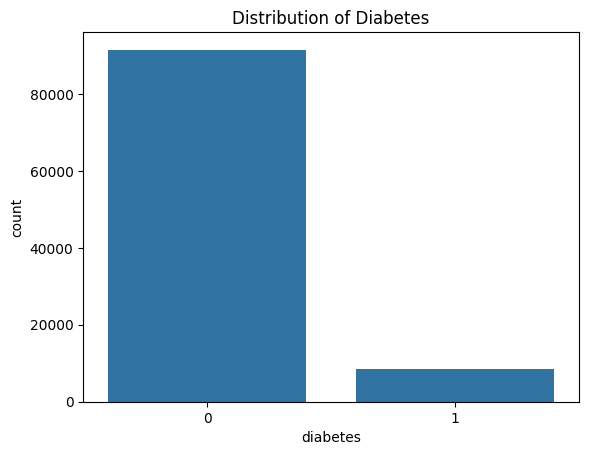

In [20]:
# plot the distribution of the target variable (assuming 'Outcome' column is the target)
sns.countplot(x='diabetes', data=data)
plt.title("Distribution of Diabetes")
plt.show()


In [21]:
# checking for outliers in numerical columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,100000.0,4.146600e-01,0.493031,0.000000,0.000000,0.000000,1.000000,2.000000
age,100000.0,1.447553e-16,1.000005,-1.856658,-0.794336,0.049481,0.804475,1.692704
hypertension,100000.0,7.485000e-02,0.263150,0.000000,0.000000,0.000000,0.000000,1.000000
heart_disease,100000.0,3.942000e-02,0.194593,0.000000,0.000000,0.000000,0.000000,1.000000
smoking_history,100000.0,2.179650e+00,1.889659,0.000000,0.000000,3.000000,4.000000,5.000000
bmi,100000.0,-1.729816e-16,1.000005,-2.608320,-0.556111,-0.000116,0.340413,10.301613
HbA1c_level,100000.0,-3.410605e-18,1.000005,-1.893686,-0.679490,0.254508,0.628107,3.243300
blood_glucose_level,100000.0,-2.786749e-16,1.000005,-1.426210,-0.934905,0.047704,0.514444,3.978142
diabetes,100000.0,8.500000e-02,0.278883,0.000000,0.000000,0.000000,0.000000,1.000000


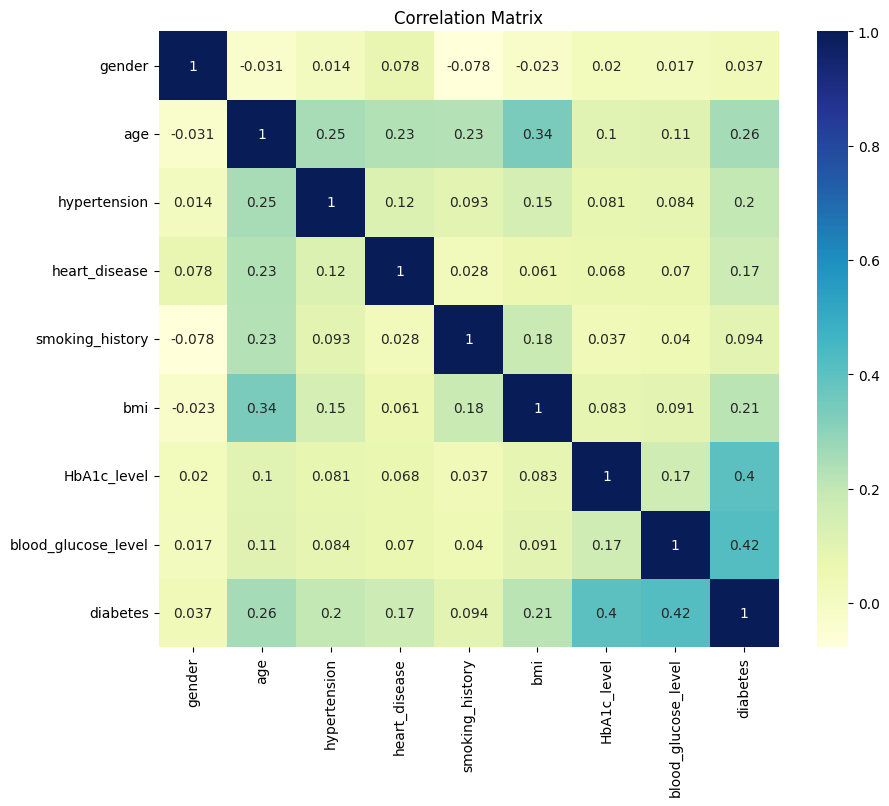

In [22]:
# correlation matrix to see relationships between variables
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix")
plt.show()


# Step 3: Data Preprocessing

In [24]:
X = data.drop(columns=['diabetes'])
y = data['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Model Training and Evaluation

In [25]:
logistic_model = LogisticRegression()
random_forest_model = RandomForestClassifier()
svc_model = SVC()

Logistic Regression Accuracy: 0.95875
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.86      0.61      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.91      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



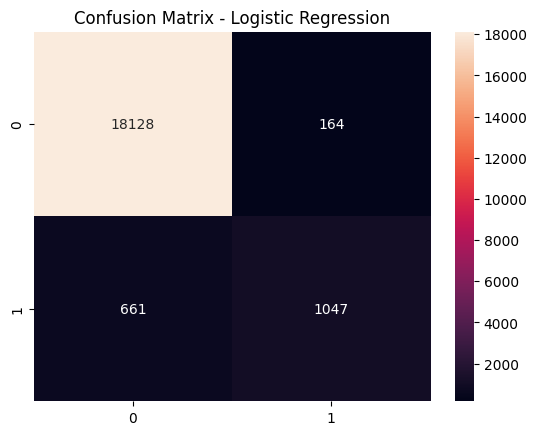

In [26]:
# Train and evaluate Logistic Regression
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)
logistic_acc = accuracy_score(y_test, y_pred_logistic)
print("Logistic Regression Accuracy:", logistic_acc)
print(classification_report(y_test, y_pred_logistic))
sns.heatmap(confusion_matrix(y_test, y_pred_logistic), annot=True, fmt="d")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

Random Forest Accuracy: 0.9703
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



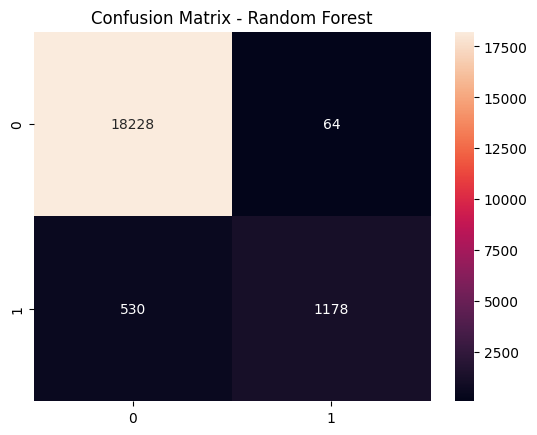

In [27]:
# Train and evaluate Random Forest Classifier
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", rf_acc)
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()



Support Vector Machine Accuracy: 0.9622
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     18292
           1       0.99      0.56      0.72      1708

    accuracy                           0.96     20000
   macro avg       0.98      0.78      0.85     20000
weighted avg       0.96      0.96      0.96     20000



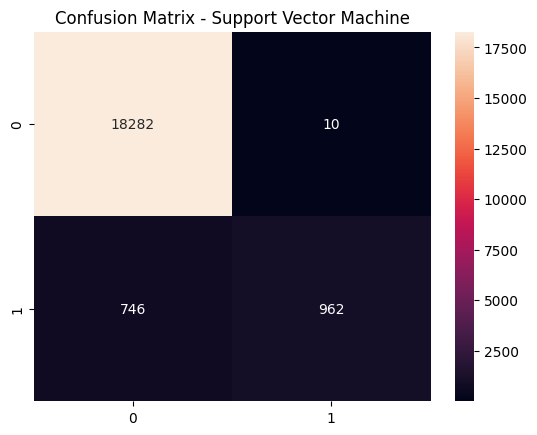

In [28]:
# Train and evaluate Support Vector Machine (SVM)
svc_model.fit(X_train, y_train)
y_pred_svc = svc_model.predict(X_test)
svc_acc = accuracy_score(y_test, y_pred_svc)
print("Support Vector Machine Accuracy:", svc_acc)
print(classification_report(y_test, y_pred_svc))
sns.heatmap(confusion_matrix(y_test, y_pred_svc), annot=True, fmt="d")
plt.title("Confusion Matrix - Support Vector Machine")
plt.show()


# Step 5: Model Comparison

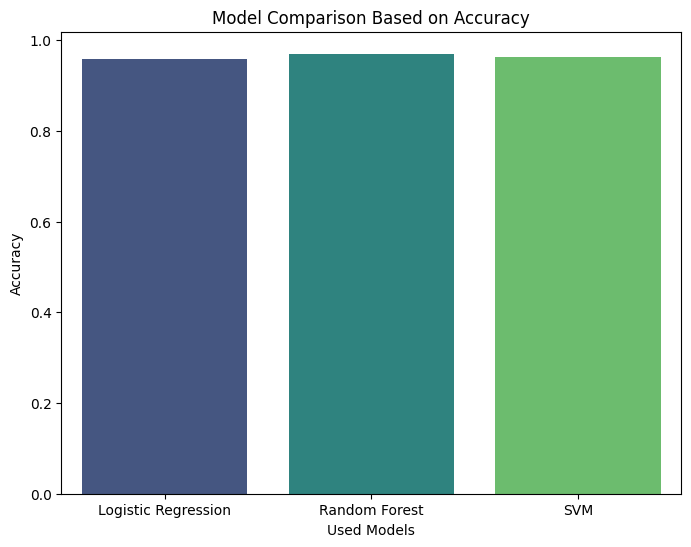

The best model is Random Forest with an accuracy of 0.97


In [30]:
model_names = ['Logistic Regression', 'Random Forest', 'SVM']
accuracies = [logistic_acc, rf_acc, svc_acc]

plt.figure(figsize=(8, 6))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Comparison Based on Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Used Models")
plt.show()

best_model_index = np.argmax(accuracies)
print(f"The best model is {model_names[best_model_index]} with an accuracy of {accuracies[best_model_index]:.2f}")